In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
%pwd

'c:\\Users\\Admin\\Desktop\\HUST.AI.Project\\Age-Gender-Prediction'

In [5]:
%pip install -r C:\Users\Admin\Desktop\HUST.AI.Project\Age-Gender-Prediction\requirements.txt

^C
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 14.0/14.0 MB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 10.0/10.0 MB 9.7 MB/s eta 0:00:00
  Using cached tensorflow-2.11.0-cp37-cp37m-win_amd64.whl (1.9 kB)
     ---------------------------------------- 7.2/7.2 MB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 7.1/7.1 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 5.1 MB/s eta 0:00:00
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
  Using cached pytz-2022.6-py2.py3-none-any.whl (498 kB)
  Using cached tensorflow_intel-2.11.0-cp37-cp37m-win_amd64.whl (266.3 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached tensorflow_io_gcs_filesystem-0.28.0-cp37-cp37m-win_amd64.whl (1.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-22.12.6-py2.py3-none-any.whl (26 kB)
  Using cache

In [9]:
# Upzip data
%unzip "./archive.zip" -d '/content/dataset'

UsageError: Line magic function `%unzip` not found.


# Exploratory Data Analysis

In [3]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, \
    Dropout, Flatten, Dense, Activation, \
    BatchNormalization
from keras import backend as K
from sklearn.model_selection import train_test_split

In [5]:
# dimensions of our images.
img_width, img_height = 128, 128
img_channels = 3
Image_Size = (img_width, img_height)

In [24]:
if K.image_data_format() == 'channels_first':
    input_shape = (img_channels, img_width, img_height)
else:
    input_shape = (img_width, img_height, img_channels)

In [8]:
data_dir = './data/UTKFace'

filenames = os.listdir(data_dir)
ages = []
genders = []
for file_name in filenames:
    age = file_name.split("_")[0]
    ages.append(int(age))

    gender = file_name.split("_")[1]
    if gender == '0':
        genders.append("male")
    else:
        genders.append('female')

df = pd.DataFrame({
    'filename': filenames,
    'age': ages,
    'gender': genders
})


In [9]:
df.head()

,filename,age,gender
0,100_0_0_20170112213500903.jpg.chip.jpg,100,male
1,100_0_0_20170112215240346.jpg.chip.jpg,100,male
2,100_1_0_20170110183726390.jpg.chip.jpg,100,female
3,100_1_0_20170112213001988.jpg.chip.jpg,100,female
4,100_1_0_20170112213303693.jpg.chip.jpg,100,female


<AxesSubplot:>

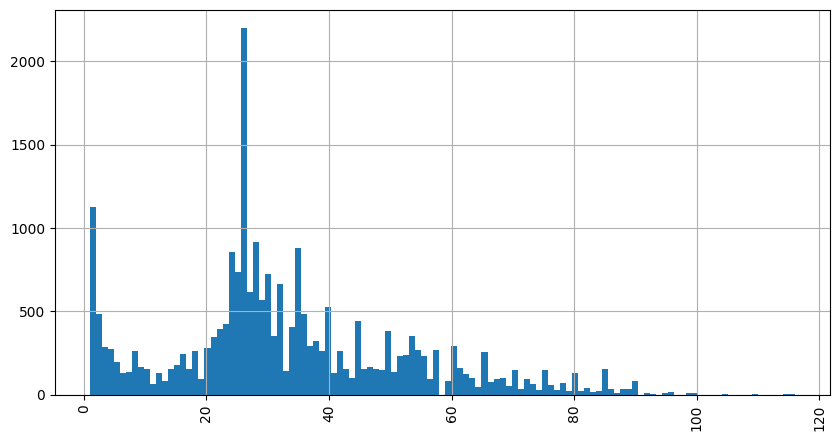

In [12]:
# histogram of df
df['age'].hist(bins=117, figsize=(10, 5), xrot=90)

<AxesSubplot:>

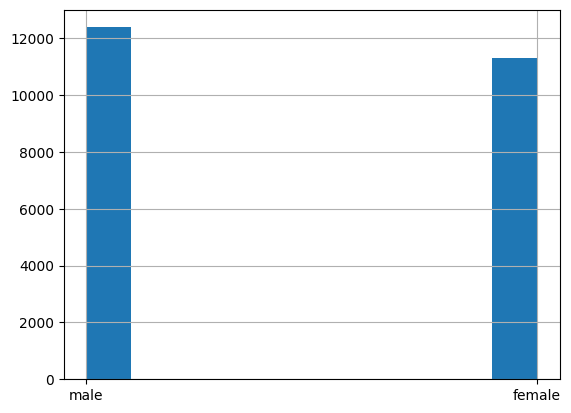

In [11]:
# histogram of df
df['gender'].hist()

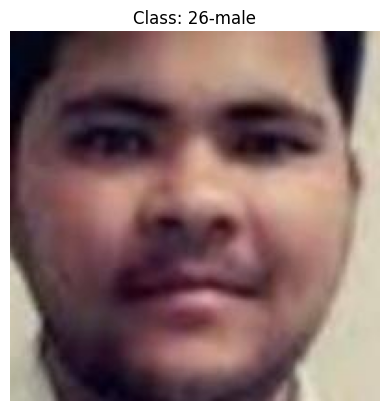

In [14]:
# looking data
sample = np.random.randint(len(df))

img_path = data_dir + "/" + df['filename'][sample]
age = df['age'][sample]
gender = df['gender'][sample]

img = Image.open(img_path)

plt.imshow(img)
plt.title(f"Class: {age}-{gender}")
plt.axis('off')
plt.show()

# Training Model

In [16]:
data_dir = 'data/UTKFace/'

filenames = os.listdir(data_dir)
ages = []
genders = []
for file_name in filenames:
    age = file_name.split("_")[0]
    ages.append(int(age))

    gender = file_name.split("_")[1]
    genders.append(int(gender))

df = pd.DataFrame({
    'filename': filenames,
    'age': ages,
    'gender': genders
})

df

,filename,age,gender
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1
...,...,...,...
23703,9_1_3_20161220222856346.jpg.chip.jpg,9,1
23704,9_1_3_20170104222949455.jpg.chip.jpg,9,1
23705,9_1_4_20170103200637399.jpg.chip.jpg,9,1
23706,9_1_4_20170103200814791.jpg.chip.jpg,9,1


In [18]:
%pip install tqdm

     -------------------------------------- 78.5/78.5 kB 620.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
from tqdm import tqdm
from PIL import Image, ImageOps

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(data_dir + image, grayscale=False)
        img = img.resize((64, 64), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    # features = features.reshape(len(features), 128, 128, 3)
    return features

In [20]:
X = extract_features(df['filename'])

  0%|          | 0/23708 [00:00<?, ?it/s]c:\Users\Admin\miniconda3\envs\ai_prj\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  
100%|██████████| 23708/23708 [04:35<00:00, 86.17it/s] 


In [22]:
# Normalize the images
X = X / 255.0

In [23]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [26]:
from tensorflow.keras import Input, Model

input_shape = (64, 64, 3)

inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)
# conv_5 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_4)
# maxp_5 = MaxPooling2D(pool_size=(2, 2)) (conv_5)

flatten_age = Flatten() (maxp_4)
# 1096
flatten_gender = Flatten() (maxp_3)

# fully connected layers
dense_1 = Dense(128, activation='relu') (flatten_gender)
dense_2 = Dense(128, activation='relu') (flatten_age)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

# sex
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
# age
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

# mae = mean square error
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 62, 62, 32)   896         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 31, 31, 32)  0           ['conv2d_9[0][0]']               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 29, 29, 64)   18496       ['max_pooling2d_8[0][0]']        
                                                                                              

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
# Train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 98s 159ms/step - loss: 11.5240 - gender_out_loss: 0.6449 - age_out_loss: 10.8792 - gender_out_accuracy: 0.6181 - age_out_accuracy: 0.0591 - val_loss: 33.8754 - val_gender_out_loss: 0.5666 - val_age_out_loss: 33.3088 - val_gender_out_accuracy: 0.7153 - val_age_out_accuracy: 0.0000e+00
Epoch 2/30
593/593 [==============================] - 93s 157ms/step - loss: 8.8537 - gender_out_loss: 0.4803 - age_out_loss: 8.3735 - gender_out_accuracy: 0.7696 - age_out_accuracy: 0.0432 - val_loss: 31.5003 - val_gender_out_loss: 0.4902 - val_age_out_loss: 31.0101 - val_gender_out_accuracy: 0.7623 - val_age_out_accuracy: 0.0000e+00
Epoch 3/30
593/593 [==============================] - 79s 133ms/step - loss: 7.6309 - gender_out_loss: 0.4007 - age_out_loss: 7.2302 - gender_out_accuracy: 0.8127 - age_out_accuracy: 0.0159 - val_loss: 29.4990 - val_gender_out_loss: 0.4647 - val_age_out_loss: 29.0343 - val_gender_out_accuracy: 0.7832 - val_age_out_accuracy

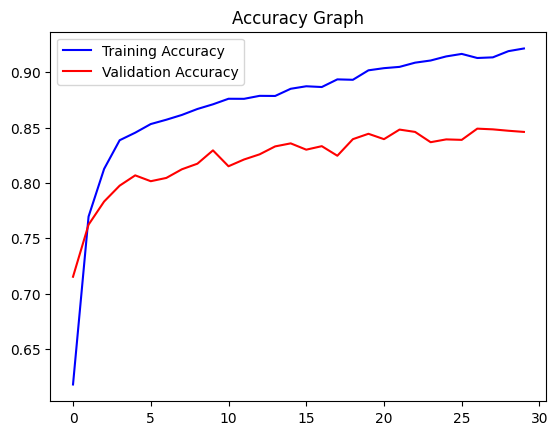

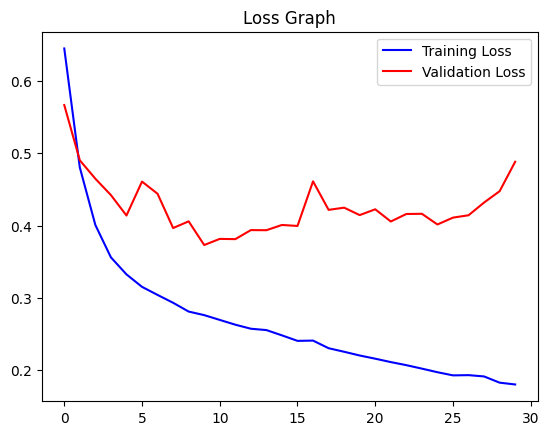

In [31]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

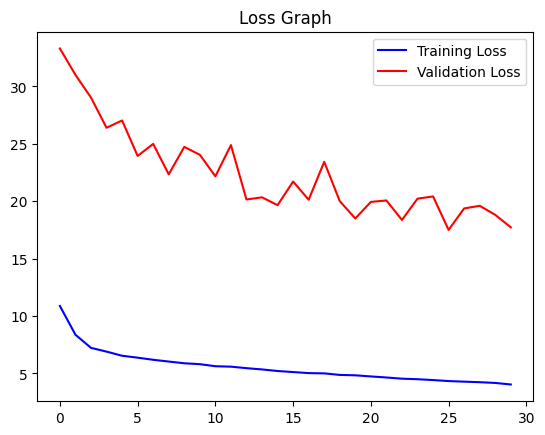

In [32]:
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [33]:
model.save("checkpoints/model.h5")

1/1 [==============================] - 0s 31ms/step
Original Gender: Male, Original Age: 10
Predicted Gender: Male, Predicted Age: 21


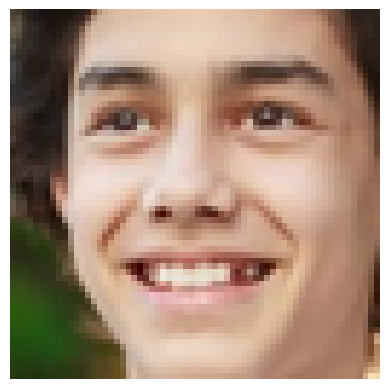

In [37]:
image_index = 1000
gender_dict = {0:'Male', 1:'Female'}

# predict from model
pred = model.predict(X[image_index].reshape(1, 64, 64, 3))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(f"Original Gender: {gender_dict[y_gender[image_index]]}, Original Age: {y_age[image_index]}")
print(f"Predicted Gender: {pred_gender}, Predicted Age: {pred_age}")
plt.axis('off')
plt.imshow(X[image_index]);

-------------------------------------------------------------------------------✈

In [48]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Hust/Age-Gender-Prediction"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Hust/Age-Gender-Prediction


In [49]:
import os

import tensorflow as tf
from tensorflow import keras

from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("checkpoints/model.h5")
%cd "./testimg"

In [74]:
%ls

hermione.png  mixi.png  phuong0.png  phuong1.png  thuytien.png


In [101]:
def testimg(path): 
    img = load_img(path, grayscale=False)
    img = img.resize((64, 64), Image.ANTIALIAS)
    img = np.array(img)
    gender_dict = {0:'Male', 1:'Female'}

    # predict from model
    pred = model.predict(img.reshape(1, 64, 64, 3))
    pred_gender = gender_dict[round(pred[0][0][0])]
    pred_age = round(pred[1][0][0]/100)

    print(f"Predicted Gender: {pred_gender}, Predicted Age: {(pred_age)}")
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    return

1/1 [==============================] - 0s 24ms/step
Predicted Gender: Male, Predicted Age: 32


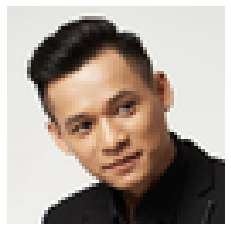

1/1 [==============================] - 0s 38ms/step
Predicted Gender: Female, Predicted Age: 36


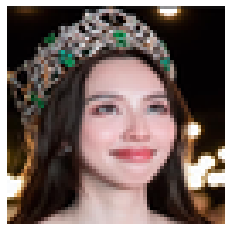

1/1 [==============================] - 0s 28ms/step
Predicted Gender: Female, Predicted Age: 15


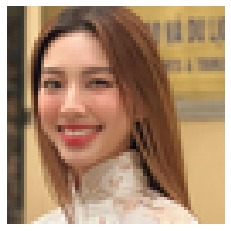

1/1 [==============================] - 0s 66ms/step
Predicted Gender: Male, Predicted Age: 22


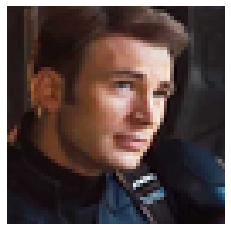

1/1 [==============================] - 0s 68ms/step
Predicted Gender: Male, Predicted Age: 35


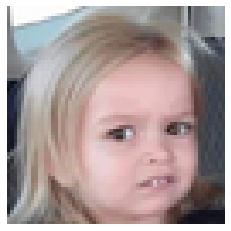

In [102]:
# testimg("phuong0.png")
# testimg("phuong1.png")
testimg("mixi.png")
testimg("thuytien.png")
testimg("nguoiyeucu.png")
testimg("evans.png")
testimg("littlegirl.png")
